# 6.4 EV Regression Model

## This script will contain the following:

**1. Importing libraries and data**

**2. Data cleaning**

**3. Data prep for regression analysis**

**4. Regression analysis**

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/mitchellkubik/Desktop/Advanced Analytics & Dashboard Design'

In [5]:
df = pd.read_csv(os.path.join(path, 'Assignment Data','Prepared EV Data', 'df_ev_cleaned.csv'))

In [6]:
df.head()

,Unnamed: 0,vin,county,city,state,postal_code,year,make,model,ev_type,cafv_eligibility,electric_range,base_msrp,dol_v_id,v_location,electric_utility,2020_census_tract
0,0,2C4RC1N71H,Kitsap,Bremerton,WA,98311,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,1,2C4RC1N7XL,Stevens,Colville,WA,99114,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,2,KNDC3DLCXN,Yakima,Yakima,WA,98908,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [7]:
df = df.drop('Unnamed: 0', axis = 1)

In [8]:
df.head()

,vin,county,city,state,postal_code,year,make,model,ev_type,cafv_eligibility,electric_range,base_msrp,dol_v_id,v_location,electric_utility,2020_census_tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [9]:
df.rename(columns = {'2020_census_tract' : 'geo_id'}, inplace = True)

In [10]:
columns = ['county', 'city', 'state', 'year', 'make', 'model', 'electric_range', 'base_msrp', 'dol_v_id', 'geo_id']

In [11]:
df_2 = df[columns]

In [12]:
df_2.head()

,county,city,state,year,make,model,electric_range,base_msrp,dol_v_id,geo_id
0,Kitsap,Bremerton,WA,2017,CHRYSLER,PACIFICA,33,0,349437882,5.303509e+10
1,Stevens,Colville,WA,2020,CHRYSLER,PACIFICA,32,0,154690532,5.306595e+10
2,Yakima,Yakima,WA,2022,KIA,EV6,0,0,219969144,5.307700e+10
3,Kitsap,Bainbridge Island,WA,2018,TESLA,MODEL 3,215,0,476786887,5.303509e+10
4,Thurston,Tumwater,WA,2018,NISSAN,LEAF,151,0,201185253,5.306701e+10


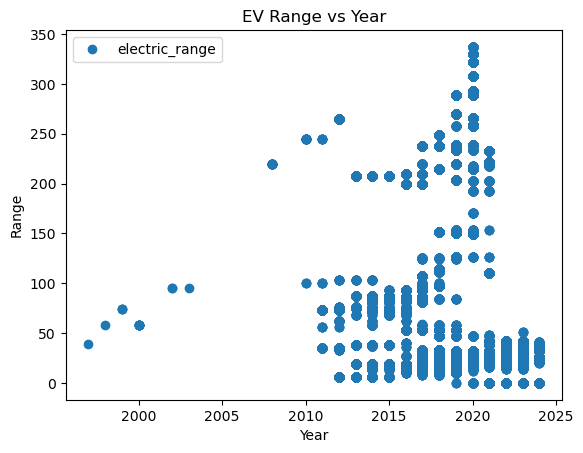

In [13]:
df_2.plot(x = 'year', y = 'electric_range', style = 'o')
plt.title('EV Range vs Year')
plt.xlabel('Year')
plt.ylabel('Range')
plt.show()

In [15]:
# Reshape variables into NumPy arrays and put them into seperate objects.

x = df_2['year'].values.reshape(-1,1)
y = df_2['electric_range'].values.reshape(-1,1)

In [16]:
x

array([[2017],
       [2020],
       [2022],
       ...,
       [2023],
       [2019],
       [2022]])

In [17]:
y

array([[ 33],
       [ 32],
       [  0],
       ...,
       [ 32],
       [220],
       [  0]])

In [18]:
# Split data into a training set and a test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## 4. Regression Analysis

**I believe that, over time, the 'electric range' of vehicles will increase as technology improves.**

In [19]:
# Create a regression object

regression = LinearRegression() # This is the regression object, which will be fit onto the training set

In [20]:
# Fit the regression object onto the training set

regression.fit(x_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using x

y_predicted = regression.predict(x_test)

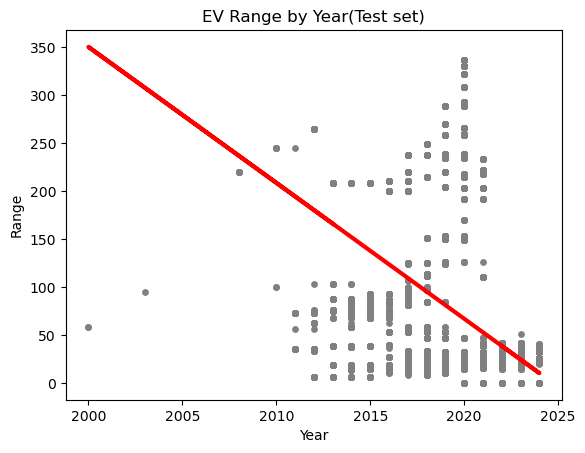

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('EV Range by Year(Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Range')
plot_test.show()

In [23]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the r2 score

In [24]:
# Print the model summary statistics. This is where you'll evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error:', rmse)
print('R2 score', r2)

Slope: [[-14.1692378]]
Mean squared error: 7173.0695752200745
R2 score 0.20145236397874722


In [25]:
y_predicted

array([[ 38.57103786],
       [ 24.40180006],
       [ 24.40180006],
       ...,
       [ 66.90951345],
       [ 24.40180006],
       [166.09417804]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,38.571038
1,0,24.401800
2,0,24.401800
3,87,137.755702
4,0,52.740276
5,0,24.401800
6,0,38.571038
7,14,109.417227
8,0,24.401800
9,0,52.740276


**Compare how the regression fits the training set**

In [27]:
# Predict

y_predicted_train = regression.predict(x_train) # This is predicting x_train

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)


In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-14.1692378]]
Mean squared error:  7124.956954360328
R2 score:  0.20336571043738005


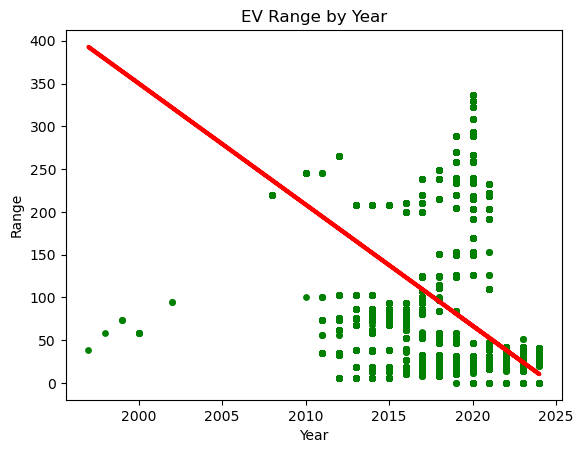

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('EV Range by Year')
plot_test.xlabel('Year')
plot_test.ylabel('Range')
plot_test.show()

In [59]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['electric_range'] >0] 

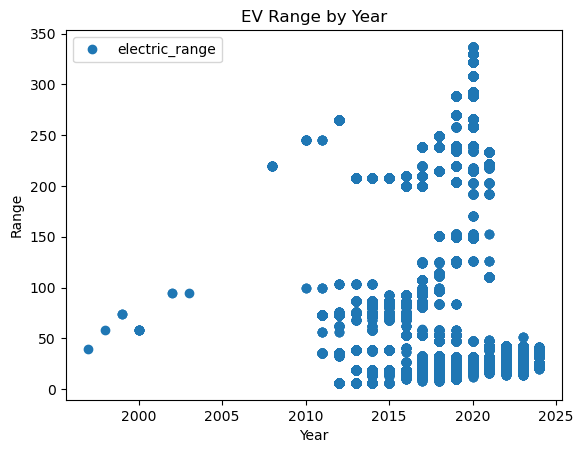

In [60]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'year', y='electric_range', style='o')  
plt.title('EV Range by Year')  
plt.xlabel('Year')  
plt.ylabel('Range')  
plt.show()

In [61]:
# Reshape again.

x_2 = df_test['year'].values.reshape(-1,1)
y_2 = df_test['electric_range'].values.reshape(-1,1)

In [62]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=0)

In [63]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(x_train_2, y_train_2)

LinearRegression()

In [64]:
# Predict.

y_predicted_2 = regression.predict(x_test_2)

In [65]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [66]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15621136]]
Mean squared error:  9791.252132986701
R2 score:  -0.00016929400523491012


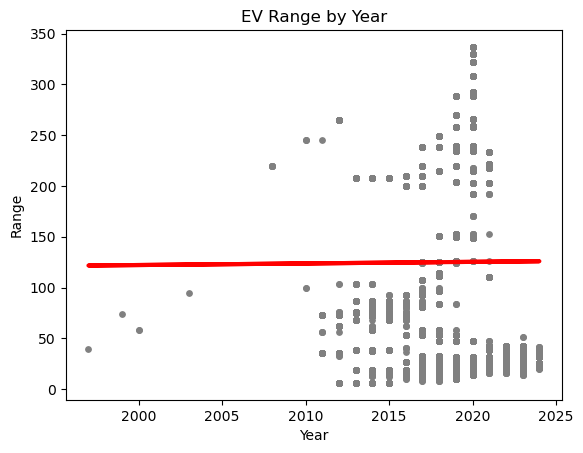

In [67]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(x_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(x_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('EV Range by Year')
plot_test.xlabel('Year')
plot_test.ylabel('Range')
plot_test.show()

In [68]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,238,125.103573
1,291,125.259784
2,266,125.259784
3,19,124.322516
4,215,124.947362
5,220,125.103573
6,210,124.634939
7,93,124.634939
8,21,125.572207
9,53,124.791150


In [69]:
df_2.to_csv(os.path.join(path, 'Assignment Data', 'Prepared EV Data', 'Cleaned EV DF for Regression Model.csv'))